In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import pickle

In [2]:
file_path = '549_anon.csv'
df = pd.read_csv(file_path)
cols = len(df.columns)
print(df.columns)

Index(['id name', 'email anonymized',
       'Are you interested in being a Team Representative? ',
       '42fe167ba501618b6249f01a553922a5', '23b905f8978c9602a332c6d4db5e4dfc',
       '0c191666595f4572b1a4b119d79f1b27', '10d6e34993468045bda816cf681db42f',
       '2f69412091650d9c399b76adc16cfa1d', '34feab0fb7e895c79bef8e170d499fb8',
       'anonymized group preference', 'anonymized project assignment'],
      dtype='object')


In [3]:
cols

11

In [4]:
numOfProjects = 6
columns_to_drop = ['email anonymized']
df_dropped_multiple = df.drop(columns=columns_to_drop)

# If you want to modify the DataFrame in place, use inplace=True
df.drop(columns=columns_to_drop, inplace=True)


column_name_mapping = {
    df.columns[0]: 'id',
    df.columns[1]: 'representative',
    df.columns[-2]: 'friends',
    df.columns[-1]: 'assignment'  
}


for i in range(2, numOfProjects + 2):
    column_name_mapping[df.columns[i]] = df.columns[i][-5:]
    
df.rename(columns=column_name_mapping, inplace=True)

In [5]:
df.columns

Index(['id', 'representative', '922a5', 'e4dfc', 'f1b27', 'db42f', 'cfa1d',
       '99fb8', 'friends', 'assignment'],
      dtype='object')

In [6]:
df['representative'].astype(str)
df['representative'] = df['representative'].map({'No': 0, 'Maybe': 1, 'Yes': 1})

In [7]:
n = df.shape[0]
print(f'num of students = {n}')

num of students = 26


In [8]:
projects = [p for p in list(df.columns[2:numOfProjects+2])]
projects

['922a5', 'e4dfc', 'f1b27', 'db42f', 'cfa1d', '99fb8']

In [9]:
c = dict()
G = nx.Graph()
nodes = []
assignment = dict()
representatives = dict()
for i in range(len(df)):
    row = df.iloc[i]
    id = row[0]
    id = id[-5:]
    assignment[id] = str(row[numOfProjects+3])[-5:]
    nodes.append(id)
    preferences = [int(p[:-2]) if type(p) == str else len(projects) for p in row[2:numOfProjects+2]]
    
    for p, pref in zip(projects, preferences):
        c[(str(id), p)] = (numOfProjects - pref + 1) / numOfProjects
        
    
    # friends
    friends = row[numOfProjects+2].strip("[]").replace("'", "").split(",")
    for f in friends:
        if f:
            G.add_edge(id, f[-5:])
            
    # represenatitive
    representatives[id] = row[1]
    
G.add_nodes_from(nodes)
G_c = nx.complement(G)
w = dict()
for e in G_c.edges:
    w[e] = 1
edges = list(G_c.edges)

[('7b1b9', '7e351'), ('cfc5f', '8b401'), ('f6abd', 'eef1d'), ('7fd51', 'f72f3'), ('7fd51', 'ac44e'), ('f72f3', '1336f'), ('1336f', 'ac44e'), ('a3004', 'ebf2d'), ('a3004', '97c9a'), ('ebf2d', '97c9a'), ('e4cdc', '88177'), ('88177', '07ba3'), ('1a1ba', '83784'), ('dbeb4', 'db1a9')]


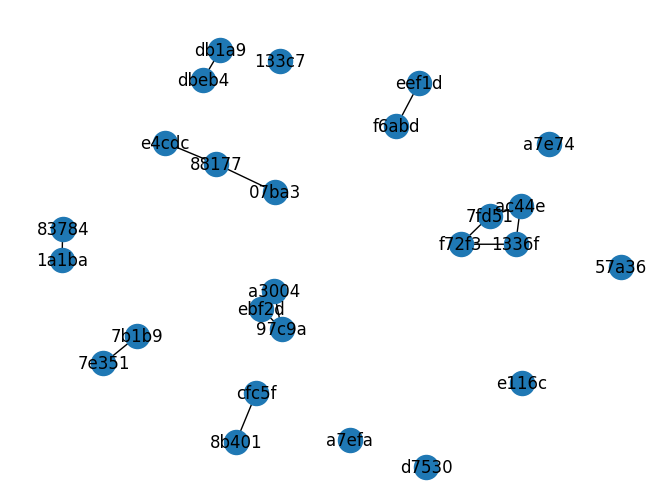

In [10]:
# friends graph
print(G.edges)
nx.draw(G, pos=nx.spring_layout(G, k=0.2, iterations=20), with_labels=True)

In [11]:
max_capacities = dict()
for p in projects:
    max_capacities[p] = 4
max_capacities['db42f'] = 6
edges = list(G_c.edges)

In [12]:
with open(f'./csDS549_LinNorm.pickle', 'wb') as file:
    pickle.dump(projects, file) # project names
    pickle.dump(max_capacities, file) # max capacity for each project
    pickle.dump(c, file) # project preferences
    pickle.dump(w, file) # weights of conflict edges
    pickle.dump(edges, file) # conflict edges
    pickle.dump(assignment, file) # manual project assignments
    pickle.dump(representatives, file) # representatives
    file.close()

In [13]:
len(G.nodes)

26

In [14]:
print(G.nodes)

['7b1b9', '7e351', 'cfc5f', '8b401', 'f6abd', 'eef1d', '7fd51', 'f72f3', '1336f', 'ac44e', 'a3004', 'ebf2d', '97c9a', 'e4cdc', '88177', '07ba3', '1a1ba', '83784', 'dbeb4', 'db1a9', 'e116c', 'd7530', '57a36', 'a7e74', 'a7efa', '133c7']


In [15]:
assignment

{'e116c': '922a5',
 '7b1b9': 'db42f',
 'd7530': 'e4dfc',
 'cfc5f': '99fb8',
 '8b401': '99fb8',
 'f6abd': 'f1b27',
 'eef1d': 'f1b27',
 '7e351': 'db42f',
 '57a36': 'cfa1d',
 '7fd51': 'db42f',
 '1336f': 'cfa1d',
 'f72f3': 'db42f',
 'ac44e': 'cfa1d',
 'a3004': 'e4dfc',
 '83784': '99fb8',
 'a7e74': 'f1b27',
 'ebf2d': 'e4dfc',
 'db1a9': '99fb8',
 'e4cdc': '922a5',
 '07ba3': '922a5',
 'a7efa': 'f1b27',
 '1a1ba': '99fb8',
 '97c9a': 'cfa1d',
 '88177': '922a5',
 'dbeb4': 'e4dfc',
 '133c7': '99fb8'}